In [1]:
import pandas as pd

engagement = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [2]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
group = engagement.groupby(['user_id', pd.Grouper(key='time_stamp', freq='W')]).count()
group['adopted_user'] = group[group['visited'] >= 3].astype(bool)
adopted_users_ids = group[group['adopted_user'] == True].index.unique(level=0)
users['adopted_user'] = [1 if i in adopted_users_ids else 0 for i in users.object_id]

In [4]:
users.isnull().any()

object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time     True
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
adopted_user                  False
dtype: bool

In [5]:
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)
users['invited'] = [1 if i != 0 else 0 for i in users.invited_by_user_id]
print(users.invited.value_counts())
users.head()

1    6417
0    5583
Name: invited, dtype: int64


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1


In [8]:
X = users.loc[:,['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','invited']]
y = users.adopted_user

X_dum = pd.get_dummies(X)
X_dum.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,1,1,0,0,0,0
1,0,0,1,0,1,0,0,0
2,0,0,1,0,1,0,0,0
3,0,0,1,1,0,0,0,0
4,0,0,1,1,0,0,0,0


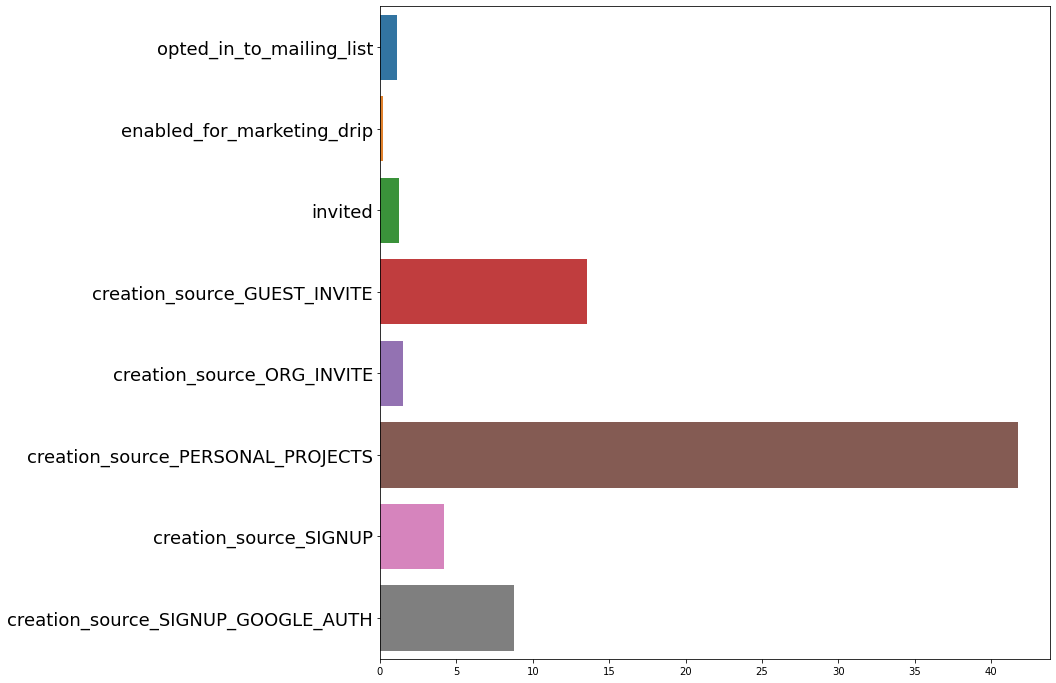

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.25, random_state=2)
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)

mask = fs.get_support()
feature_names = X_dum.columns[mask]
feature_scores = fs.scores_[mask]

plt.figure(figsize=(12,12))
sns.barplot(x=feature_scores, y=feature_names)
plt.yticks(fontsize=18)
plt.show()

In [6]:
users.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [10]:
X_w_org = users.loc[:,['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','invited','org_id']]
X_w_org = pd.get_dummies(X_w_org)
X_w_org = pd.get_dummies(X_w_org, columns=['org_id'])
X_w_org.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,org_id_1,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


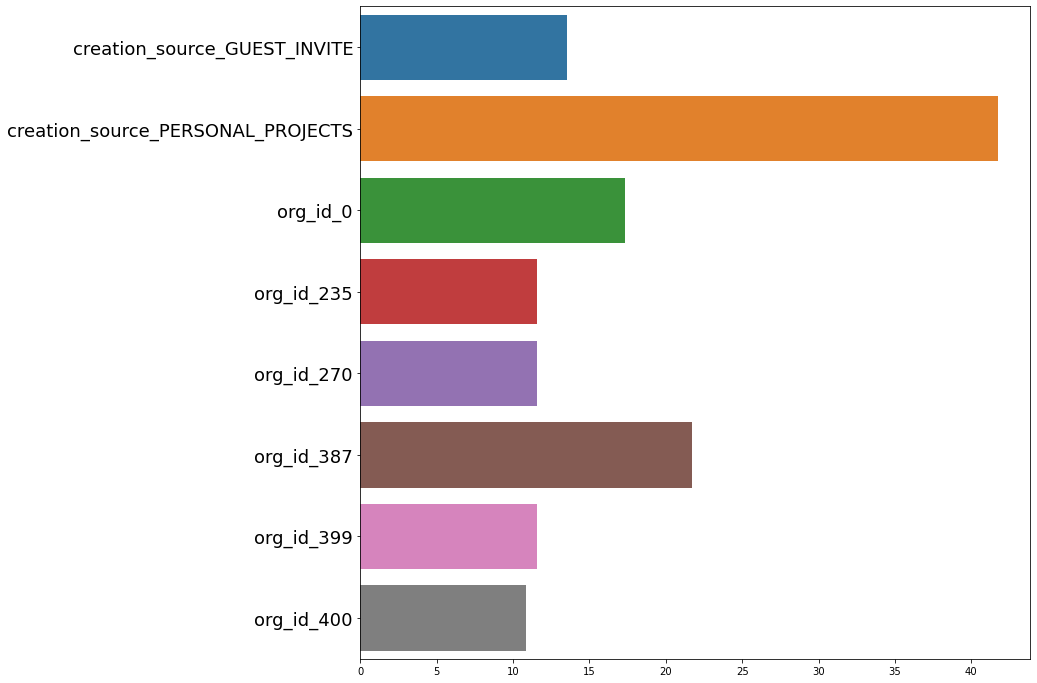

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_w_org, y, test_size=0.25, random_state=2)
fs = SelectKBest(score_func=chi2, k=8)
fs.fit(X_train, y_train)

mask = fs.get_support()
feature_names = X_w_org.columns[mask]
feature_scores = fs.scores_[mask]

plt.figure(figsize=(12,12))
sns.barplot(x=feature_scores, y=feature_names)
plt.yticks(fontsize=18)
plt.show()